In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_point
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier

In [ ]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = df.drop(['gender', 'PhoneService', 'TotalCharges'], axis=1)
df

,customerID,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,3668-QPYBK,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,7795-CFOCW,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,9237-HQITU,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,Yes,Yes,24,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,No
7039,2234-XADUH,0,Yes,Yes,72,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,No
7040,4801-JZAZL,0,Yes,Yes,11,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,No
7041,8361-LTMKD,1,Yes,No,4,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,Yes


In [ ]:
y = df["Churn"]
enc = LabelEncoder()
y = enc.fit_transform(y)

data = df.iloc[:, 1:-1]
df["Churn"]=enc.fit_transform(df["Churn"])

In [ ]:
c = (data.dtypes == "object")
catcol = list(c[c].index)
c

SeniorCitizen       False
Partner              True
Dependents           True
tenure              False
MultipleLines        True
InternetService      True
OnlineSecurity       True
OnlineBackup         True
DeviceProtection     True
TechSupport          True
StreamingTV          True
StreamingMovies      True
Contract             True
PaperlessBilling     True
PaymentMethod        True
MonthlyCharges      False
dtype: bool

In [ ]:
for col in catcol:
  data[col] = enc.fit_transform(data[col])

In [ ]:
X = data
target = df["Churn"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.05, random_state = 42)

In [ ]:
MLP = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', max_iter=200,  random_state=42)
# There are 4 activation function: 'relu','identity','logistic','tanh'
# There are 3 solver 'sgd','adam','lbfgs'
# Thử các cách để so sánh accuracy

In [ ]:
MLP.fit(X_train,y_train)

MLPClassifier(random_state=42)

In [ ]:
y_pred=MLP.predict(X_test)

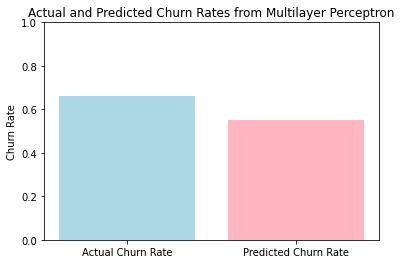

In [ ]:
cm2 = confusion_matrix(y_test, y_pred)
actual_churn_rate = cm2[1, 1] / (cm2[1, 1] + cm2[0, 1])
predicted_churn_rate = cm2[1, 1] / (cm2[1, 1] + cm2[1, 0])

# Create a bar chart of the predicted and actual churn rates
labels2 = ['Actual Churn Rate', 'Predicted Churn Rate']
values2 = [actual_churn_rate, predicted_churn_rate]
colors2 = ['lightblue', 'lightpink']

plt.bar(labels2, values2, color=colors2)
plt.title('Actual and Predicted Churn Rates from Multilayer Perceptron')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()

In [ ]:
MLP.n_iter_

125

In [ ]:
pd.DataFrame(y_pred)

,0
0,1
1,0
2,0
3,1
4,0
...,...
348,0
349,0
350,1
351,0


In [ ]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8158640226628895

In [ ]:
weights = abs(MLP.coefs_[0])
feature_importances = weights.sum(axis=1)

# Normalize the feature importances
feature_importances /= feature_importances.sum()

# Create a dataframe with the feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances.sort_values('Importance', ascending=False, inplace=True)

print(feature_importances)


             Feature  Importance
0      SeniorCitizen    0.087721
12          Contract    0.085948
5    InternetService    0.078500
4      MultipleLines    0.069300
11   StreamingMovies    0.065354
10       StreamingTV    0.063814
2         Dependents    0.063164
6     OnlineSecurity    0.062780
14     PaymentMethod    0.060837
1            Partner    0.058876
13  PaperlessBilling    0.058820
9        TechSupport    0.056365
7       OnlineBackup    0.051946
8   DeviceProtection    0.048536
3             tenure    0.047634
15    MonthlyCharges    0.040406


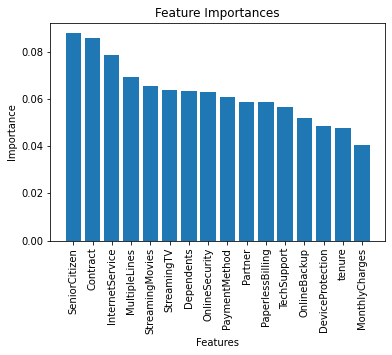

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis objects
fig, ax = plt.subplots()

# Plot the feature importances as a bar chart
ax.bar(feature_importances['Feature'], feature_importances['Importance'])

# Set the title and labels
ax.set_title('Feature Importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importance')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the chart
plt.show()

Confusion Matrix

In [ ]:
from sklearn import metrics

In [ ]:
confusion_matrix=metrics.confusion_matrix(y_pred,y_test)
confusion_matrix

array([[239,  40],
       [ 25,  49]])

K-Fold

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
cv = KFold(n_splits=100,random_state=42, shuffle=True)
cv

KFold(n_splits=100, random_state=42, shuffle=True)

In [ ]:
scores = cross_val_score(MLP, X, y, cv=100)
scores
scores.mean()

0.7972394366197184

AUC


In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.datasets import make_classification

In [ ]:
y_pred_proba = MLP.predict_proba(X_test)[:, 1]

In [ ]:
auc_score = roc_auc_score(y_test, y_pred_proba)
auc_score
# the AUC can be computed by first obtaining the predicted probabilities for each class, and then computing the AUC using these probabilities and the true labels.

0.8642747701736465

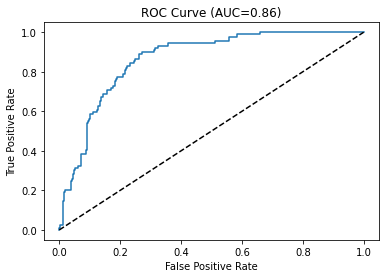

In [ ]:
# compute the FPR, TPR, and threshold values for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC={auc_score:.2f})')
plt.show()